In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import seaborn as sns

In [30]:
#Load the Dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
print('Train: X = ', x_train.shape)
print('Test: X = ', x_test.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


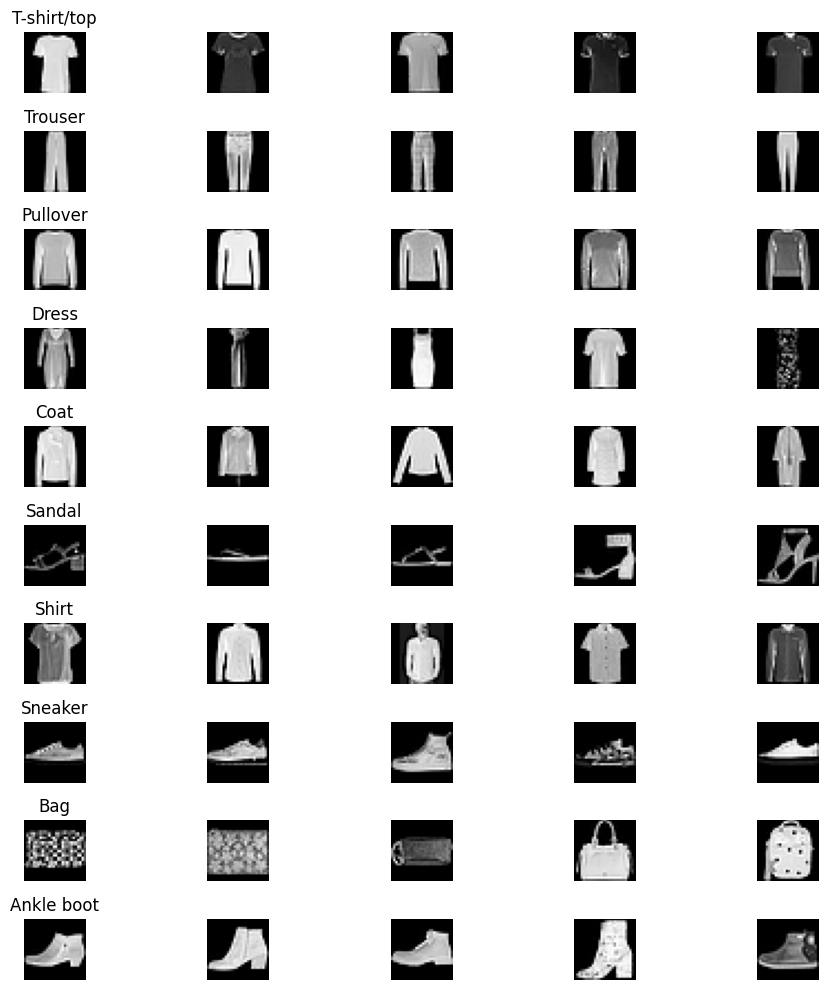

In [32]:
#visualize the labels
class_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(10, 10))
for class_index in range(len(class_labels)):
    indices = np.where(y_train == class_index)[0]

    if len(indices) < 5 :
        selected_indices = indices
    else:
        selected_indices = np.random.choice(indices, num_samples_per_class, replace=False)

    for i, idx in enumerate(selected_indices):
        plt.subplot(len(class_labels), 5 , class_index * 5 + i + 1)
        plt.imshow(x_train[idx], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(class_labels[class_index])

plt.tight_layout()
plt.show()


In [33]:
# Normalizing the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [34]:
# Flattening the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [35]:
# One-hot encode
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [36]:
#Model Development
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#Compiling the Model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
#Training the Model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5471 - loss: 1.3040 - val_accuracy: 0.8062 - val_loss: 0.5816
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7736 - loss: 0.6573 - val_accuracy: 0.8209 - val_loss: 0.5086
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8049 - loss: 0.5606 - val_accuracy: 0.8367 - val_loss: 0.4612
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8233 - loss: 0.5165 - val_accuracy: 0.8433 - val_loss: 0.4373
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8291 - loss: 0.4908 - val_accuracy: 0.8482 - val_loss: 0.4253
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8358 - loss: 0.4680 - val_accuracy: 0.8518 - val_loss: 0.4087
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8414 - loss: 0.4476 - val_accuracy: 0.8545 - val_loss: 0.3976
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8463 - loss: 0.4383 - 

In [39]:
# Evaluating the Model
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')

val_loss, val_accuracy = model.evaluate(x_train[int(len(x_train) * 0.8):],
                                         y_train[int(len(y_train) * 0.8):])
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8898 - loss: 0.2992
Training Loss: 0.30750611424446106, Training Accuracy: 0.88673335313797
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8761 - loss: 0.3346
Validation Loss: 0.3387719988822937, Validation Accuracy: 0.8738333582878113
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3577
Test Loss: 0.36412298679351807, Test Accuracy: 0.8700000047683716


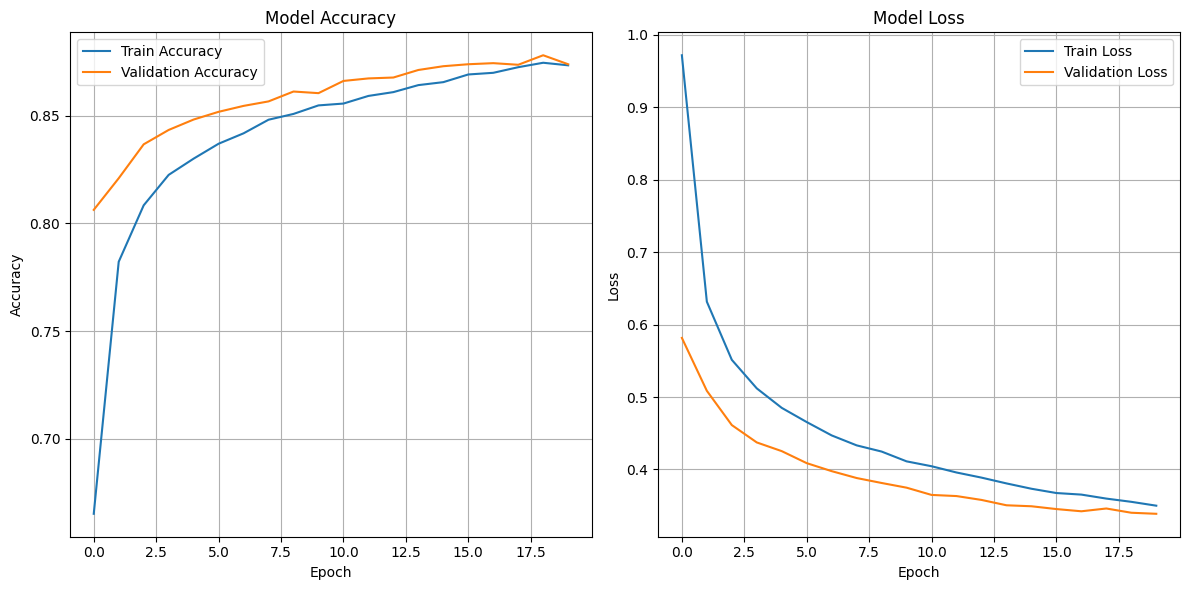

In [40]:
#Visualizing
plt.figure(figsize=(12, 6))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()